In [104]:
import pandas as pd
from matplotlib import pyplot as plot
import matplotlib.style as style
import seaborn as sns
df_policy = pd.read_csv("./policy_stats_history.csv")
df_default = pd.read_csv("./default_stats_history.csv")

In [105]:
## Prepare data
def dropUnwanted(df):
    df = df[["Type", "Timestamp","Total Request Count", "Total Median Response Time"]]
    df = df.dropna(how='any')
    df = df.drop_duplicates(subset=["Total Request Count"])
    df = df[(df[["Total Request Count"]] != 0).all(axis=1)]
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    return df
    
df_policy = dropUnwanted(df_policy)
df_default = dropUnwanted(df_default)

df_policy.head()

,Type,Timestamp,Total Request Count,Total Median Response Time
16,GET,2020-07-22 21:53:27,1,8106
18,GET,2020-07-22 21:53:29,2,1400
22,GET,2020-07-22 21:53:33,3,1400
28,GET,2020-07-22 21:53:39,4,1200
32,GET,2020-07-22 21:53:43,5,1200


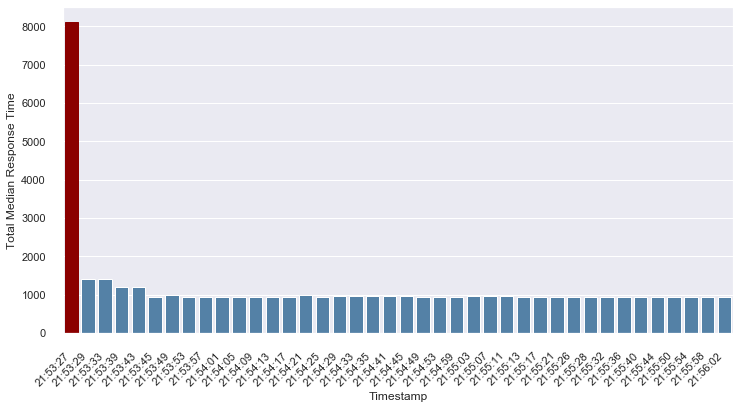

In [122]:
sns.set(style="darkgrid")
plot.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

def plotBar(df):
    fig, ax = plot.subplots(figsize = (12,6))    
    fig = sns.barplot(x=df['Timestamp'], y=df['Total Median Response Time'], color="steelblue")  

    x_dates = df['Timestamp'].dt.strftime('%H:%M:%S').sort_values().unique()
    ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
    ax.patches[0].set_color('darkred')
    ax.set_ylabel("Total Median Response Time/ms")    

plotBar(df_policy.head(n=40))

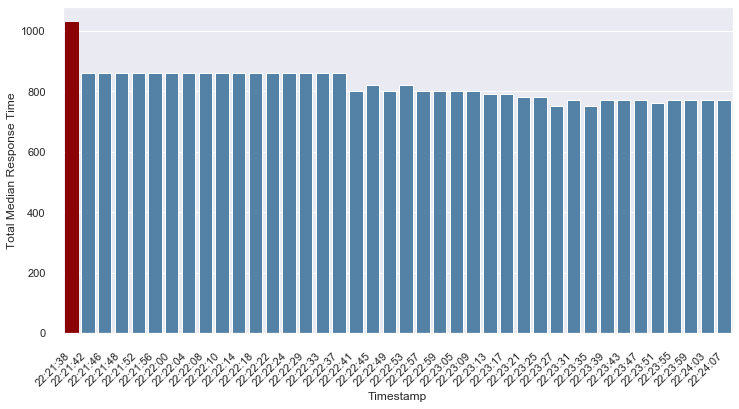

In [123]:
plotBar(df_default.head(n=40))

In [153]:
[df_default['Total Median Response Time'].iloc[-1], df_policy['Total Median Response Time'].iloc[-1]]

[790, 900]

Text(0, 0.5, 'Total Median Response Time / ms')

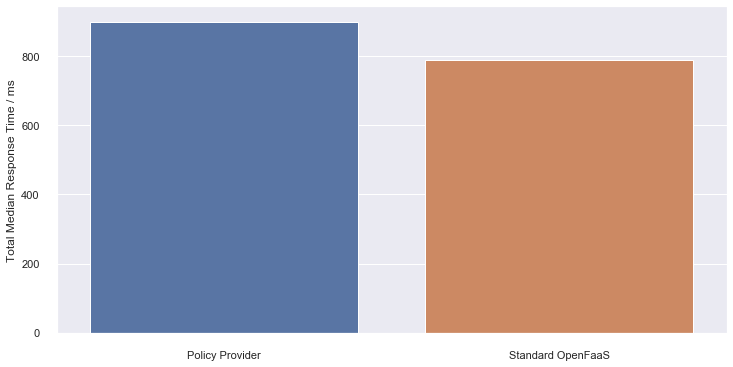

In [158]:
fig, ax = plot.subplots(figsize = (12,6))    
fig = sns.barplot(x=['Policy Provider', "Standard OpenFaaS"], y=[df_policy['Total Median Response Time'].iloc[-1], df_default['Total Median Response Time'].iloc[-1]])
ax.set_ylabel("Total Median Response Time / ms")